### Importing Libraries

In [155]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn. preprocessing import StandardScaler

### Importing Data

In [156]:
train_data = pd.read_csv("0000000000002429_training_titanic_x_y_train.csv")
test_data = pd.read_csv("0000000000002429_test_titanic_x_test.csv")

### Understanding the data

In [157]:
# print(train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [158]:
train_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [159]:
categorical_cols = [var for var in train_data.columns if train_data[var].dtype == 'O']
print(categorical_cols)


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## EDA for Categorical Columns

#### Gender vs SURVIVED Column

Male Count = 427
Female Count = 241


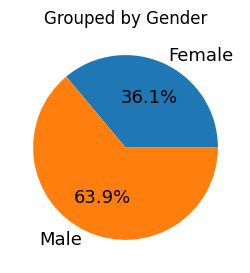

In [160]:
sex_count = train_data.groupby('Sex')['Sex'].count()
print(f"Male Count = {sex_count.male}")
print(f"Female Count = {sex_count.female}")
plt.figure(figsize=(3,3))
plt.title('Grouped by Gender')
plt.pie(sex_count.values, labels=['Female', 'Male'], autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

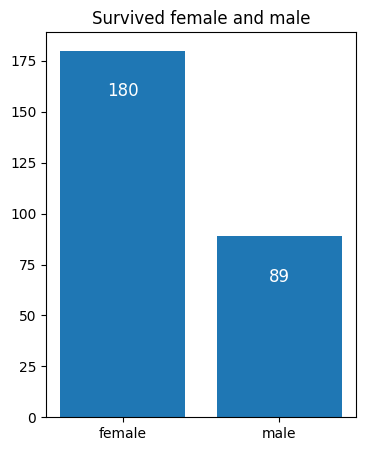

In [161]:
survived_sex = train_data.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

##### From this we can say that even though the count of female passengers were less, they have a higher survive count. This implies that gender played an important role in the chance of survival.

#### CABIN v/s SURVIVED Column

##### Unique Values in Cabin

In [162]:
uniqueCabinValues= train_data.Cabin.unique()
print(uniqueCabinValues)

[nan 'C123' 'C91' 'A36' 'E67' 'C65' 'F G63' 'C118' 'E40' 'D49' 'B19' 'D21'
 'C110' 'C83' 'A16' 'C85' 'C92' 'C62 C64' 'D20' 'C70' 'B22' 'E24' 'F E69'
 'E12' 'C111' 'B96 B98' 'D17' 'E17' 'D30' 'E101' 'D15' 'D6' 'C68' 'E25'
 'B18' 'G6' 'D11' 'C93' 'C90' 'C104' 'D26' 'C148' 'C46' 'C126' 'D35' 'D9'
 'B5' 'E77' 'T' 'F2' 'B49' 'A10' 'E34' 'D56' 'E44' 'C49' 'D33' 'B86' 'B20'
 'D47' 'C82' 'C78' 'C125' 'D' 'C32' 'C2' 'B57 B59 B63 B66' 'E33' 'B78'
 'B39' 'A19' 'E38' 'A31' 'F G73' 'C124' 'B4' 'E68' 'A20' 'F33' 'E36' 'C47'
 'B35' 'D28' 'D36' 'D10 D12' 'E10' 'B3' 'B101' 'B102' 'B80' 'B77'
 'B82 B84' 'B51 B53 B55' 'C22 C26' 'E121' 'C95' 'C52' 'B30' 'A6' 'A32'
 'B69' 'E50' 'C86' 'E49' 'C101' 'C23 C25 C27' 'E46' 'A24' 'A23' 'B28' 'F4'
 'E8' 'B79' 'C45' 'D48' 'C7' 'C106' 'B37' 'D19' 'D46']


##### Missing % in Cabin

In [163]:
null_percentage = (train_data['Cabin'].isnull().sum() / train_data['Cabin'].size)*100
print(f"Data missing in Cabin column : {null_percentage:.2f}%")
print(f"Data available in Cabin column : {100-null_percentage:.2f}%")


Data missing in Cabin column : 76.95%
Data available in Cabin column : 23.05%


##### Checking Assocation

Chi-square statistic: 63.327483320611975
p-value: 1.7504490756173756e-15


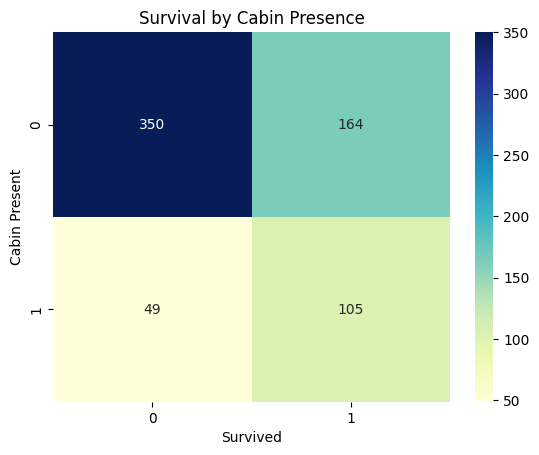

In [164]:
# Create a new column 'CabinBool' that indicates if a cabin number is present
data = train_data['Cabin'].notnull().astype('int')


# Create a crosstab
crosstab = pd.crosstab(data, train_data['Survived'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

# Plot the crosstab
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival by Cabin Presence')
plt.xlabel('Survived')
plt.ylabel('Cabin Present')
plt.show()




##### From the Chi-square statistics(value being large) and p-value (being very small i.e less than 0.05: we can reject null hypothesis that there is no association) we can say that there is a high assocation between surviving and having a cabin

#### EMBARKED v/s SURVIVED Columns 

In [165]:
uniqueEmbarkedValues = train_data.Embarked.value_counts()
print(uniqueEmbarkedValues)

Embarked
S    484
C    133
Q     50
Name: count, dtype: int64


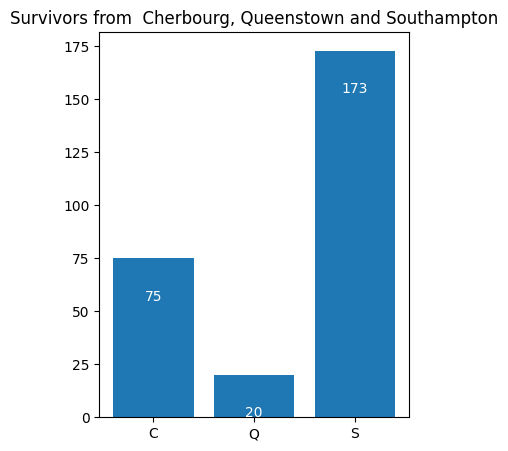

In [166]:
survived_embarked = train_data.groupby('Embarked')['Survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_embarked.index, survived_embarked.values)
plt.title('Survivors from  Cherbourg, Queenstown and Southampton')
for i, value in enumerate(survived_embarked.values):
    plt.text(i, value-20, str(value), fontsize=10, color='white',
             horizontalalignment='center', verticalalignment='baseline')
plt.show()

##### From here we can see that people embarked from Southampton have high survive count. But this graph does not show the complete picture because we know that even the count of people who embarked form Southampton was much higher as compared to other places. So we have to analyze it a bit more

Chi-square statistic: 18.505218205778107
p-value: 9.586121372409414e-05


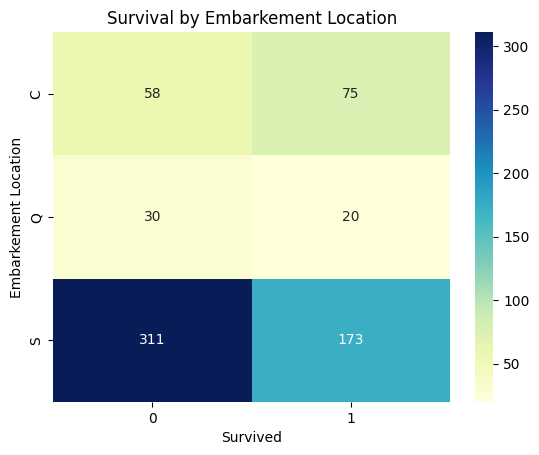

In [167]:
# Create a crosstab
crosstab2 = pd.crosstab(train_data['Embarked'], train_data['Survived'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab2)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

# Plot the crosstab
sns.heatmap(crosstab2, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival by Embarkement Location')
plt.xlabel('Survived')
plt.ylabel('Embarkement Location')
plt.show()

In [168]:
print(f"% of people survive from each location:\nC : {(survived_embarked.C / uniqueEmbarkedValues.C)*100 :.2f}%\nQ : {(survived_embarked.Q / uniqueEmbarkedValues.Q)*100:.2f}%\nS : {(survived_embarked.S / uniqueEmbarkedValues.S)*100:.2f}%")

% of people survive from each location:
C : 56.39%
Q : 40.00%
S : 35.74%


#### So it looks like people from Cherbourg have a more than 50% chance of survival. It seems like there is some association bertween survival and embarked column, so we will include this column in our model

## EDA for Numerical Coulumns

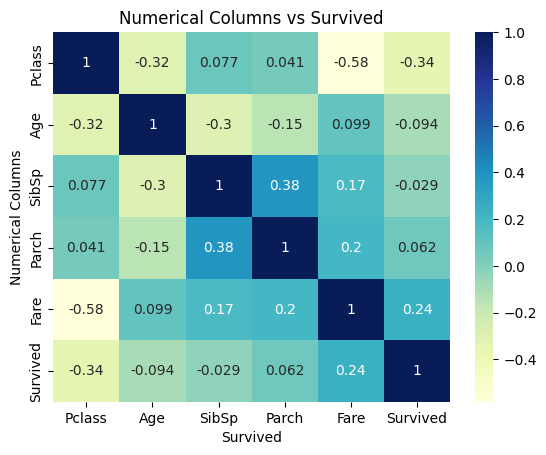

In [169]:
num_cols = ['Pclass','Age','SibSp','Parch','Fare','Survived']
train_corr = train_data[num_cols].corr()
# Plot the crosstab
sns.heatmap(train_corr, annot=True, cmap='YlGnBu')
plt.title('Numerical Columns vs Survived')
plt.xlabel('Survived')
plt.ylabel('Numerical Columns')
plt.show()


### Applying Feature Enginnering on data

In [170]:
def feature_enginnering(data):
    df = data
    #### Adding family size column 
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    #### One hot encoding Embarked Column
    df = df.dropna(subset=['Embarked'])

    embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, embarked_one_hot], axis=1)

    #### Filling empty Cabin column with character 'X' & One hot encoding Cabin Column such that only the first charcter of cabin values is taken which denotes the cabin class
    df['Cabin'] = df['Cabin'].fillna('X')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    cabin_one_hot = pd.get_dummies(df['Cabin'], prefix='Cabin')
    df = pd.concat([df, cabin_one_hot], axis=1)


    #### One hot encoding Sex Column
    sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
    df = pd.concat([df, sex_one_hot], axis=1)


    #### Filling missing age with median values
    df['Age'] = df.apply(lambda x: df['Age'].median() if np.isnan(x['Age']) else x['Age'], axis=1)

    #### Dropping columns which are not relevant anymore
    df = df.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

    print(df.columns)

    return df

In [171]:
X_train_data = feature_enginnering(train_data)
X_test_data = feature_enginnering(test_data)

Index(['Pclass', 'Age', 'Fare', 'Survived', 'FamilySize', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Sex_female',
       'Sex_male'],
      dtype='object')
Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_X', 'Sex_female', 'Sex_male'],
      dtype='object')


##### Here we see that we are missing "Cabin G" & "Cabin T" column in Test Data, so we will have to impute these columns in the dataset for standard scaler to work. We know that it is a boolean value, so we will impute everything with 0

In [172]:

X_test_data.insert(13,'Cabin_G', 0)
X_test_data.insert(14,'Cabin_T', 0)

In [174]:
print(X_test_data.columns)
print(X_test_data['Cabin_G'])

Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X', 'Sex_female', 'Sex_male'],
      dtype='object')
0      0
1      0
2      0
3      0
4      0
      ..
218    0
219    0
220    0
221    0
222    0
Name: Cabin_G, Length: 222, dtype: int64


#### Dividing data into features and target variable

In [175]:
scaler = StandardScaler()

X_train = X_train_data.drop(['Survived'], axis=1)  
y_train = X_train_data['Survived'].values   

X_test = X_test_data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [178]:
print(clf.score(X_train_scaled, y_train))

0.8050974512743628


##### Evaluating the model

In [181]:
train_predictions = clf.predict(X_train_scaled)

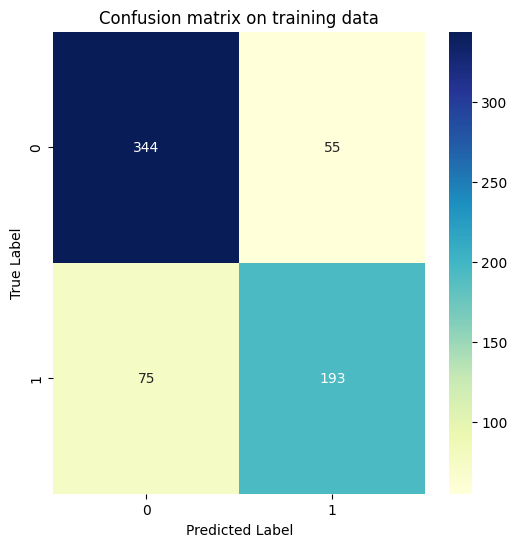

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, train_predictions)

plt.figure(figsize=(6,6))
plt.title('Confusion matrix on training data')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Making Prediction on testing Data

In [184]:
test_predictions = clf.predict(X_test_scaled)

In [186]:
np.savetxt("submission.csv", test_predictions)